In [141]:
%matplotlib inline

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm,datasets
from sklearn.model_selection import cross_val_score,train_test_split, StratifiedKFold,KFold
from sklearn.metrics import confusion_matrix,precision_recall_curve,average_precision_score,roc_curve,auc


In [8]:
iris = datasets.load_iris()
X,y = iris.data,iris.target
X,y,iris.target_names = X[y !=2],y[y!= 2],['setoda','versicolor']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

random_state = np.random.RandomState(0)
n_samples,n_features = X.shape
X=np.c_[X,random_state.randn(n_samples,200*n_features)]


[[13  0]
 [ 0 12]]


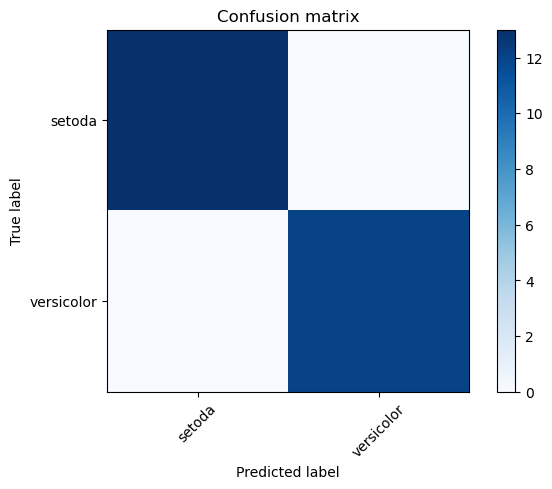

In [142]:
classifier = svm.SVC(kernel = 'linear',C = 0.01)
y_pred = classifier.fit(X_train,y_train).predict(X_test)

def plot_confusion_matrix(cm,title = 'Confusion matrix',cmap =plt.cm.Blues):
    plt.imshow(cm,interpolation = 'nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks,iris.target_names,rotation = 45)
    plt.yticks(tick_marks,iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm = confusion_matrix(y_test,y_pred)
print(cm)
np.set_printoptions(precision = 2)
plt.figure()
plot_confusion_matrix(cm)

In [83]:
folds = 5

cv = StratifiedKFold(shuffle = True,n_splits = folds,random_state = 80)

classifier = svm.SVC(kernel = 'linear',probability = True)

/var/folders/ll/jvzd_hvs51j8yv5s0wr73xn40000gn/T/ipykernel_51519/598808621.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr,fpr,tpr)
/var/folders/ll/jvzd_hvs51j8yv5s0wr73xn40000gn/T/ipykernel_51519/598808621.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr,fpr,tpr)
/var/folders/ll/jvzd_hvs51j8yv5s0wr73xn40000gn/T/ipykernel_51519/598808621.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr,fpr,tpr)
/var/folders/ll/jvzd_hvs51j8yv5s0wr73xn40000gn/T/ipykernel_51519/598808621.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr,fpr,tpr)
/var/folders/ll/jvzd_hvs51j8yv5s0wr73xn40000gn/T/ipykernel_51519/598808621.py:12: De

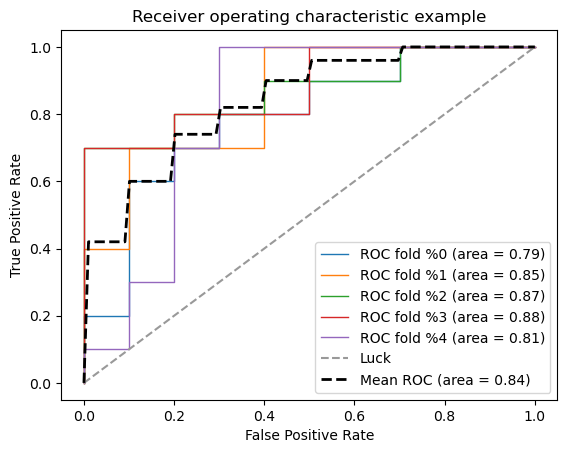

In [113]:
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr = []
precision,recall,average_precision = [],[],[]

for i,(train,test) in enumerate(cv.split(X,y)):
    clf = classifier.fit(X[train],y[train]).predict_proba(X[test])
    fpr,tpr,thresholds = roc_curve(y[test],clf[:,1])
    #mean_tpr += interp(mean_fpr,fpr,tpr)
    #mean_tpr[0] = 0.0
    roc_auc = auc(fpr,tpr)
    mean_tpr += interp(mean_fpr,fpr,tpr)

    mean_tpr[0] = 0
    
    plt.plot(fpr,tpr,lw = 1,label = 'ROC fold %{} (area = {:.2f})'.format(i,roc_auc))
    
    precision_score, recall_score, _ = precision_recall_curve(y[test], clf[:, 1])
    
    precision.append(precision_score)
    
    recall.append(recall_score)
    
    average_precision.append( average_precision_score(y[test], clf[:, 1]) )
    
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [72]:
y[train]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

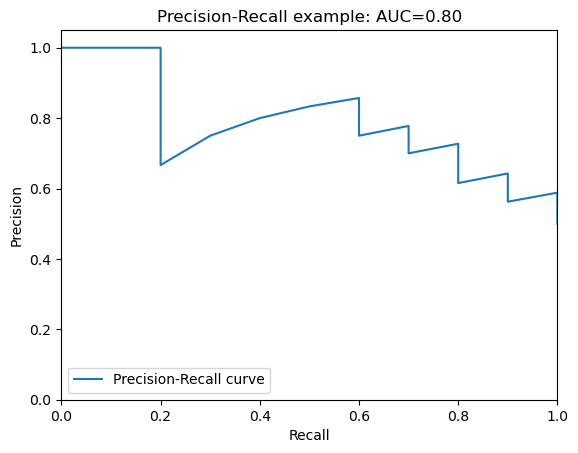

In [114]:
plt.clf()
plt.plot(recall[0], precision[0], label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

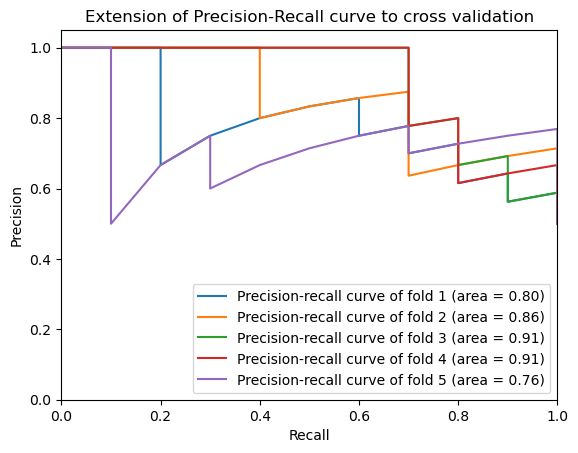

In [115]:
plt.clf()
for i in range(folds):
    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of fold {0} (area = {1:0.2f})'
                   ''.format(i+1, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to cross validation')
plt.legend(loc="lower right")
plt.show()



In [118]:
from sklearn.model_selection import learning_curve

In [139]:
def plot_learning_curve(estimator,title,X,y,ylim = None,cv = None,n_jobs = 1,train_sizes = np.linspace(0.1,1,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

In [123]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

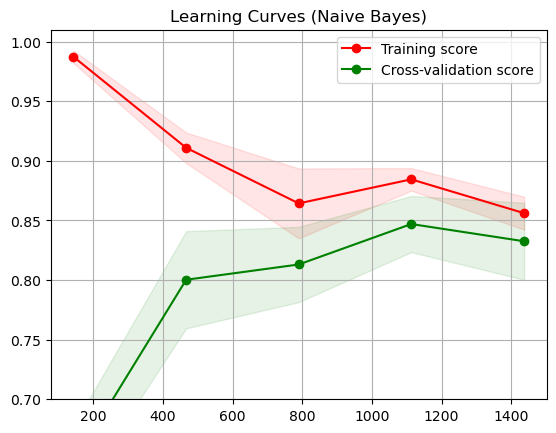

In [140]:
from sklearn.naive_bayes import GaussianNB

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = StratifiedKFold(shuffle = True,n_splits = folds,random_state = 80)


estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

In [127]:
plot_learning_curve?